# 案例：检测异常服务器

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [46]:
mat = sio.loadmat('E:/ML_NG/8-anomaly detection and recommendation/data/ex8data1.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [47]:
X = mat['X']
Xval,yval = mat['Xval'],mat['yval']
X.shape,Xval.shape,yval.shape

((307, 2), (307, 2), (307, 1))

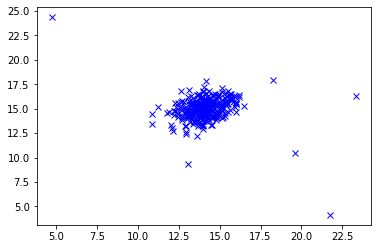

In [48]:
plt.plot(X[:,0],X[:,1],'bx')
plt.show()

## 获取训练集中样本的均值和误差

In [49]:
def edstimateGaussian(X,isCovariance):
    means = np.mean(X,axis=0)
    if isCovariance:
        sigma2 = (X - means).T @(X - means) / len(X)
    else:
        sigma2 = np.var(X,axis=0)
    return means,sigma2

In [50]:
means,sigma2 = edstimateGaussian(X,isCovariance= True)
sigma2

array([[ 1.83263141, -0.22712233],
       [-0.22712233,  1.70974533]])

In [77]:
means,sigma2 = edstimateGaussian(X,isCovariance= False)
sigma2

array([1.83263141, 1.70974533])

## 多元正态分布密度函数

In [75]:
def gaussian(X,means,sigma2):
    
    if np.ndim(sigma2) ==1:  #判断维度
        sigma2 = np.diag(sigma2)
        
    X = X - means
    n = X.shape[1]
    
    first = np.power(2*np.pi,-n/2)*(np.linalg.det(sigma2)**(-0.5))
    second = np.diag(X@np.linalg.inv(sigma2)@X.T)
    p = first * np.exp(-0.5*second)
    p = p.reshape(-1,1)
    
    return p

## 绘图

In [53]:
def plotGaussian(X,means,sigma2):
    x = np.arange(0,30,0.5)
    y = np.arange(0,30,0.5)
    xx,yy = np.meshgrid(x,y)
    z = gaussian(np.c_[xx.ravel(),yy.ravel()],means,sigma2)  #计算对应高斯分布函数
    zz = z.reshape(xx.shape)
    plt.plot(X[:,0],X[:,1],'bx')
    contour_levels = [10**h for h in range(-20,0,3)]
    plt.contour(xx,yy,zz,contour_levels)

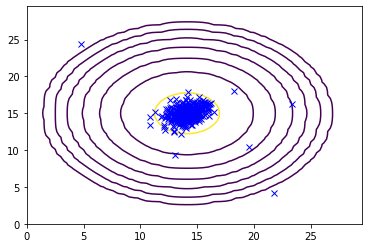

In [54]:
means,sigma2 = edstimateGaussian(X,isCovariance= False)
plotGaussian(X,means,sigma2)

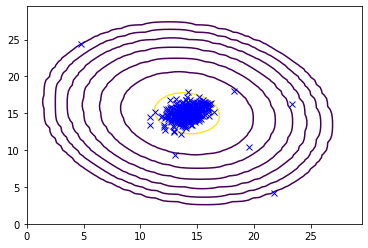

In [55]:
means,sigma2 = edstimateGaussian(X,isCovariance= True)
plotGaussian(X,means,sigma2)

## 阈值epsilon选取

In [56]:
def selectThreshold(yval,p):
    bestEpsilon = 0
    bestF1 = 0
    epsilon = np.linspace(min(p),max(p),1000)
    for e in epsilon:
        p_ = p<e
        tp = np.sum((yval == 1) & (p_ == 1))
        fp = np.sum((yval == 0) & (p_ == 1))
        fn = np.sum((yval == 1) & (p_ == 0))
        prec = tp / (tp + fp) if (tp+fp) else 0
        rec = tp / (tp + fn) if (tp+fn) else 0
        F1_e = 2 * prec * rec / (prec + rec) if (prec + rec) else 0
        if F1_e > bestF1:
            bestF1 = F1_e
            bestEpsilon = e
        return bestEpsilon,bestF1

In [78]:
means,sigma2 = edstimateGaussian(X,isCovariance= False)
pval = gaussian(Xval,means,sigma2)
bestEpsilon,bestF1 = selectThreshold(yval,pval)

ValueError: operands could not be broadcast together with shapes (100,11) (2,) 

In [58]:
bestEpsilon,bestF1

(0, 0)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

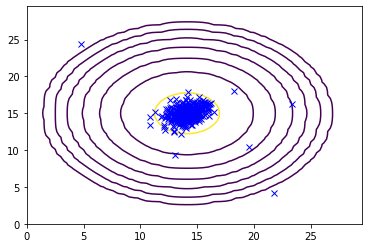

In [59]:
p = gaussian(X,means,sigma2)
anoms = np.array([X[i] for i in range(X.shape[0]) if p[i]<bestEpsilon])
plotGaussian(X,means,sigma2)
plt.scatter(anoms[:,0],anoms[:,1],c='r',marker='o')

In [60]:
anoms[:,0]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

# 案例：高维数据的异常检测

In [62]:
mat = sio.loadmat('E:/ML_NG/8-anomaly detection and recommendation/data/ex8data2.mat')
X2 = mat['X']
Xval2,yval2 = mat['Xval'],mat['yval']
X2.shape

(1000, 11)

In [64]:
means,sigma2 = edstimateGaussian(X2,isCovariance= False)
pval = gaussian(X2,means,sigma2)
bestEpsilon,bestF1 = selectThreshold(yval2,pval)
p = gaussian(X2,means,sigma2)
anoms = [X2[i] for i in range(len(X2)) if p[i]<bestEpsilon]
len(anoms)

ValueError: operands could not be broadcast together with shapes (100,1) (1000,1) 